# COVID-19 Data Analysis

In [52]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
from datetime import datetime


In [53]:
# Load the data
df = pd.read_csv('WHO-COVID-19-global-data.csv')
df.head()


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [54]:
# Check the shape of the data, i.e. number of rows and columns
df.shape


(51120, 8)

In [55]:
# Check the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51120 entries, 0 to 51119
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      51120 non-null  object 
 1   Country_code       50907 non-null  object 
 2   Country            51120 non-null  object 
 3   WHO_region         47286 non-null  object 
 4   New_cases          36698 non-null  float64
 5   Cumulative_cases   51120 non-null  int64  
 6   New_deaths         24249 non-null  float64
 7   Cumulative_deaths  51120 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [56]:
# Check the missing values in the data
df.isnull().sum()

Date_reported            0
Country_code           213
Country                  0
WHO_region            3834
New_cases            14422
Cumulative_cases         0
New_deaths           26871
Cumulative_deaths        0
dtype: int64

In [57]:
# handle missing values by filling them with 0 as it is safe to assume that if there are no new cases or deaths, then the value is 0 and then at the beginning of 2020, there were no cases or deaths
df.fillna({'New_cases': 0, 'New_deaths': 0}, inplace=True)
df.isnull().sum()

Date_reported           0
Country_code          213
Country                 0
WHO_region           3834
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [58]:
# Mapping for the provided territories to WHO regions to make the data consistent and easy to understand
territory_to_region = {
    'Holy See': 'EURO',
    'Isle of Man': 'EURO', 
    'French Guiana': 'AMRO', # French Guiana is an overseas region of France
    'Gibraltar': 'EURO', # Gibraltar is a British Overseas Territory
    'Guadeloupe': 'AMRO', # Guadeloupe is an overseas region of France
    'Guernsey': 'EURO', # Guernsey and Jersey are two Crown dependencies of the United Kingdom
    'Martinique': 'AMRO', # Martinique is an overseas region of France
    'Jersey': 'EURO',
    'Falkland Islands (Malvinas)': 'AMRO', # Falkland Islands is a British Overseas Territory
    'Faroe Islands': 'EURO',
    'Saint Martin': 'AMRO', # Saint Martin is an overseas collectivity of France
    'Liechtenstein': 'EURO',
    'Mayotte': 'AFRO',
    'Réunion': 'AFRO',
    'Saint Helena': 'AFRO',
    'Saint Pierre and Miquelon': 'AMRO',
    'Saint Barthélemy': 'AMRO',
    'Pitcairn': 'WPRO'
}

# Apply the mapping to the dataframe by creating a new column called WHO_region and lambda function to map the territories to the WHO regions
df['WHO_region'] = df.apply(
    lambda row: territory_to_region.get(row['Country'], row['WHO_region']),
    axis=1
)

df.isnull().sum()

Date_reported          0
Country_code         213
Country                0
WHO_region           213
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

In [59]:
# convert the date column to datetime format
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51120 entries, 0 to 51119
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      51120 non-null  datetime64[ns]
 1   Country_code       50907 non-null  object        
 2   Country            51120 non-null  object        
 3   WHO_region         50907 non-null  object        
 4   New_cases          51120 non-null  float64       
 5   Cumulative_cases   51120 non-null  int64         
 6   New_deaths         51120 non-null  float64       
 7   Cumulative_deaths  51120 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 3.1+ MB


In [60]:
# drop the column 'Country_code' as it is not required for the analysis
df.drop('Country_code', axis=1, inplace=True)
df.head()

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,Afghanistan,EMRO,0.0,0,0.0,0
1,2020-01-12,Afghanistan,EMRO,0.0,0,0.0,0
2,2020-01-19,Afghanistan,EMRO,0.0,0,0.0,0
3,2020-01-26,Afghanistan,EMRO,0.0,0,0.0,0
4,2020-02-02,Afghanistan,EMRO,0.0,0,0.0,0


# Exploratory Data Analysis

In [65]:
# summary statistics of the data
df.describe()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,51120,5.112000e+04,5.112000e+04,51120.000000,5.112000e+04
mean,2022-01-16 00:00:00.000000256,1.515004e+04,1.603651e+06,137.450411,1.878098e+04
min,2020-01-05 00:00:00,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,2021-01-10 00:00:00,0.000000e+00,2.779000e+03,0.000000,2.100000e+01
50%,2022-01-16 00:00:00,8.600000e+01,3.835000e+04,0.000000,4.130000e+02
75%,2023-01-22 00:00:00,1.812000e+03,4.695240e+05,18.000000,6.123250e+03
max,2024-01-28 00:00:00,4.047548e+07,1.034368e+08,47687.000000,1.170784e+06
std,NaN,2.367502e+05,7.198126e+06,860.639014,7.815541e+04


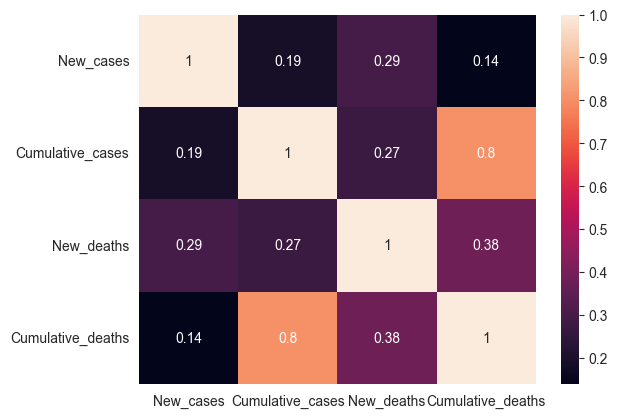

In [61]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.show()

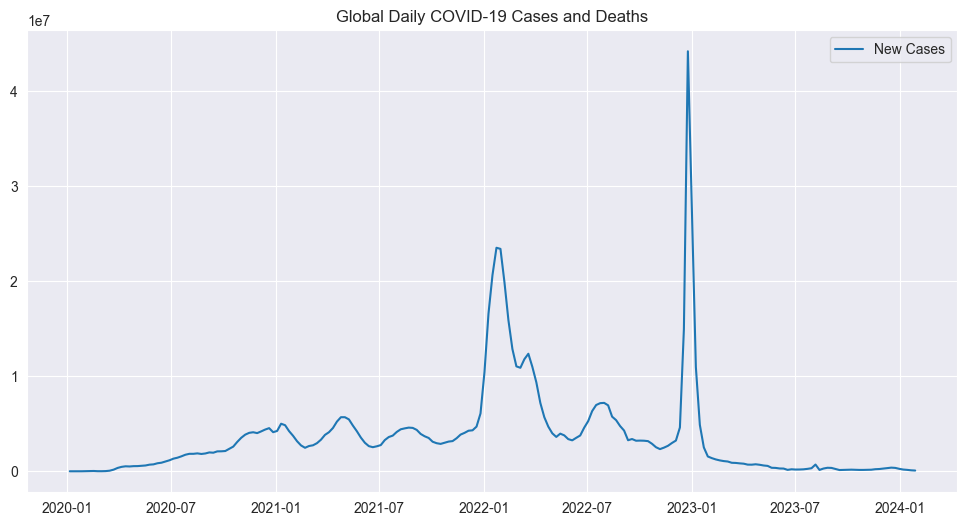

In [62]:
# check the global trends over time
plt.figure(figsize=(12, 6))
plt.plot(df.groupby('Date_reported')['New_cases'].sum(), label='New Cases')

plt.title('Global Daily COVID-19 Cases and Deaths')
plt.legend()
plt.show()

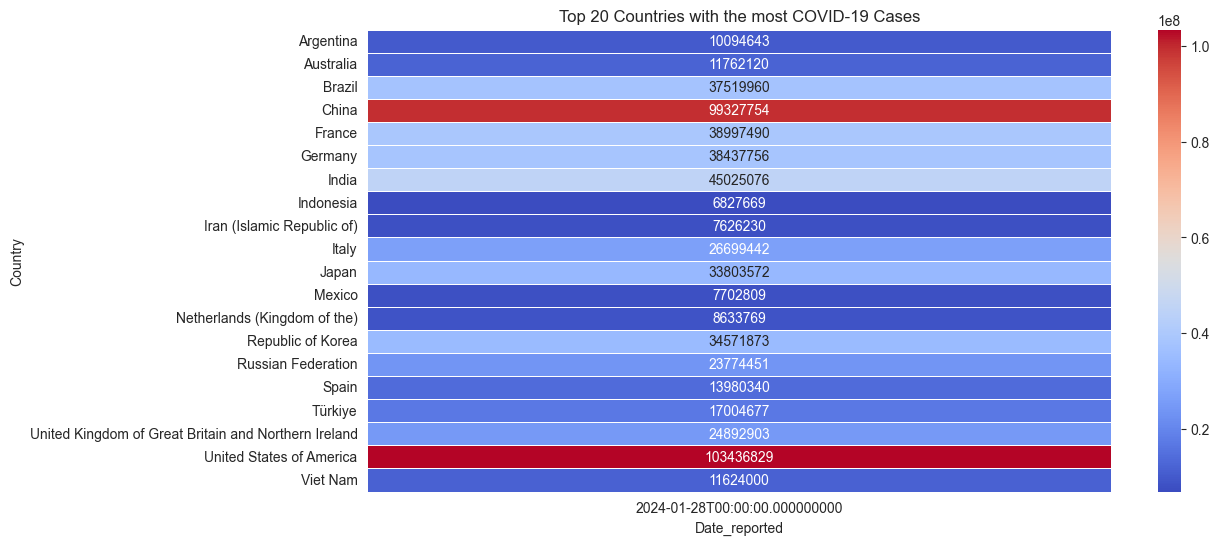

In [63]:
# Heatmap of countries with the most cases
top_countries = df[df['Date_reported'] == df['Date_reported'].max()].sort_values(by='Cumulative_cases', ascending=False).head(20)

# Create a pivot table
pivot_table = top_countries.pivot(index='Country', columns='Date_reported', values='Cumulative_cases')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.title('Top 20 Countries with the most COVID-19 Cases')
plt.show()

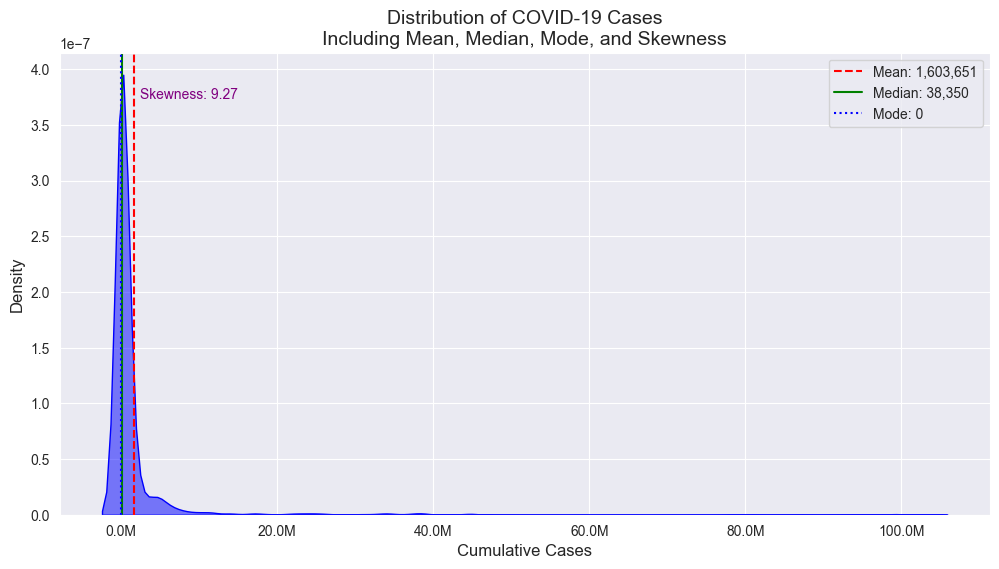

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming df['Cumulative_cases'] is your data
# Example: df = pd.DataFrame(np.random.lognormal(mean=2, sigma=0.8, size=1000), columns=['Cumulative_cases'])

# Formatter for x-axis (large numbers)
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.kdeplot(df['Cumulative_cases'], fill=True, color="b", alpha=0.5)

# Setting x-axis formatter
ax.xaxis.set_major_formatter(formatter)

# Calculate skewness
skewness = df['Cumulative_cases'].skew()

# Adding vertical lines for mean, median, and mode
plt.axvline(df['Cumulative_cases'].mean(), color='r', linestyle='--', label=f'Mean: {df["Cumulative_cases"].mean():,.0f}')
plt.axvline(df['Cumulative_cases'].median(), color='g', linestyle='-', label=f'Median: {df["Cumulative_cases"].median():,.0f}')
mode_val = df['Cumulative_cases'].mode()[0]
plt.axvline(mode_val, color='b', linestyle=':', label=f'Mode: {mode_val:,.0f}')

# Adding skewness as text on the plot
plt.text(x=df['Cumulative_cases'].mean()*1.5, y=ax.get_ylim()[1]*0.9, s=f'Skewness: {skewness:.2f}', color='purple')

# Improving the legend
plt.legend()

# Setting titles and labels
plt.title('Distribution of COVID-19 Cases\nIncluding Mean, Median, Mode, and Skewness', fontsize=14)
plt.xlabel('Cumulative Cases', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.show()


## as we can see from the plot above, the distribution of COVID-19 cases is right-skewed, which means that the mean is greater than the median and the mode. This is expected as the number of cases is positively skewed, with a few countries having a large number of cases, while most countries have a small number of cases.

## Also the mode is 0 which highlight days with no new reported cases or deaths are common across the dataset.

# Feature engineering to help us understand the data better

In [69]:
# daily cases and deaths change to understand the daily trends in the data
df['Daily_cases'] = df.groupby('Country')['New_cases'].diff().fillna(0) # fillna(0) to replace NaN values with 0
df['Daily_deaths'] = df.groupby('Country')['New_deaths'].diff().fillna(0) # fillna(0) to replace NaN values with 0


In [70]:
# Calculate the 7-day rolling average of new cases and deaths
df['New_cases_rolling_avg'] = df.groupby('Country')['New_cases'].transform(lambda x: x.rolling(7, 1).mean()).fillna(0) 
df['New_deaths_rolling_avg'] = df.groupby('Country')['New_deaths'].transform(lambda x: x.rolling(7, 1).mean()).fillna(0)


In [71]:
# Calculate the percentage change in new cases and deaths
df['New_cases_pct_change'] = df.groupby('Country')['New_cases'].pct_change().fillna(0)
df['New_deaths_pct_change'] = df.groupby('Country')['New_deaths'].pct_change().fillna(0)

df.head()

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Daily_cases,Daily_deaths,New_cases_rolling_avg,New_deaths_rolling_avg,New_cases_pct_change,New_deaths_pct_change
0,2020-01-05,Afghanistan,EMRO,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-12,Afghanistan,EMRO,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-19,Afghanistan,EMRO,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-26,Afghanistan,EMRO,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-02,Afghanistan,EMRO,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
df.tail()

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Daily_cases,Daily_deaths,New_cases_rolling_avg,New_deaths_rolling_avg,New_cases_pct_change,New_deaths_pct_change
51115,2023-12-31,Zimbabwe,AFRO,0.0,266048,0.0,5731,-23.0,-1.0,20.714286,0.714286,-1.000000,-1.0
51116,2024-01-07,Zimbabwe,AFRO,46.0,266094,3.0,5734,46.0,3.0,23.857143,1.000000,inf,inf
51117,2024-01-14,Zimbabwe,AFRO,85.0,266179,3.0,5737,39.0,0.0,29.142857,1.000000,0.847826,0.0
51118,2024-01-21,Zimbabwe,AFRO,55.0,266234,0.0,5737,-30.0,-3.0,37.000000,1.000000,-0.352941,-1.0
51119,2024-01-28,Zimbabwe,AFRO,31.0,266265,0.0,5737,-24.0,0.0,41.428571,1.000000,-0.436364,0.0


In [74]:
# case fatality rate (CFR) is the proportion of deaths from a certain disease compared to the total number of people diagnosed with the disease for a certain period across different regions
df['Case_fatality_rate'] = df['Cumulative_deaths'] / df['Cumulative_cases'] * 100



 # Data Visualization

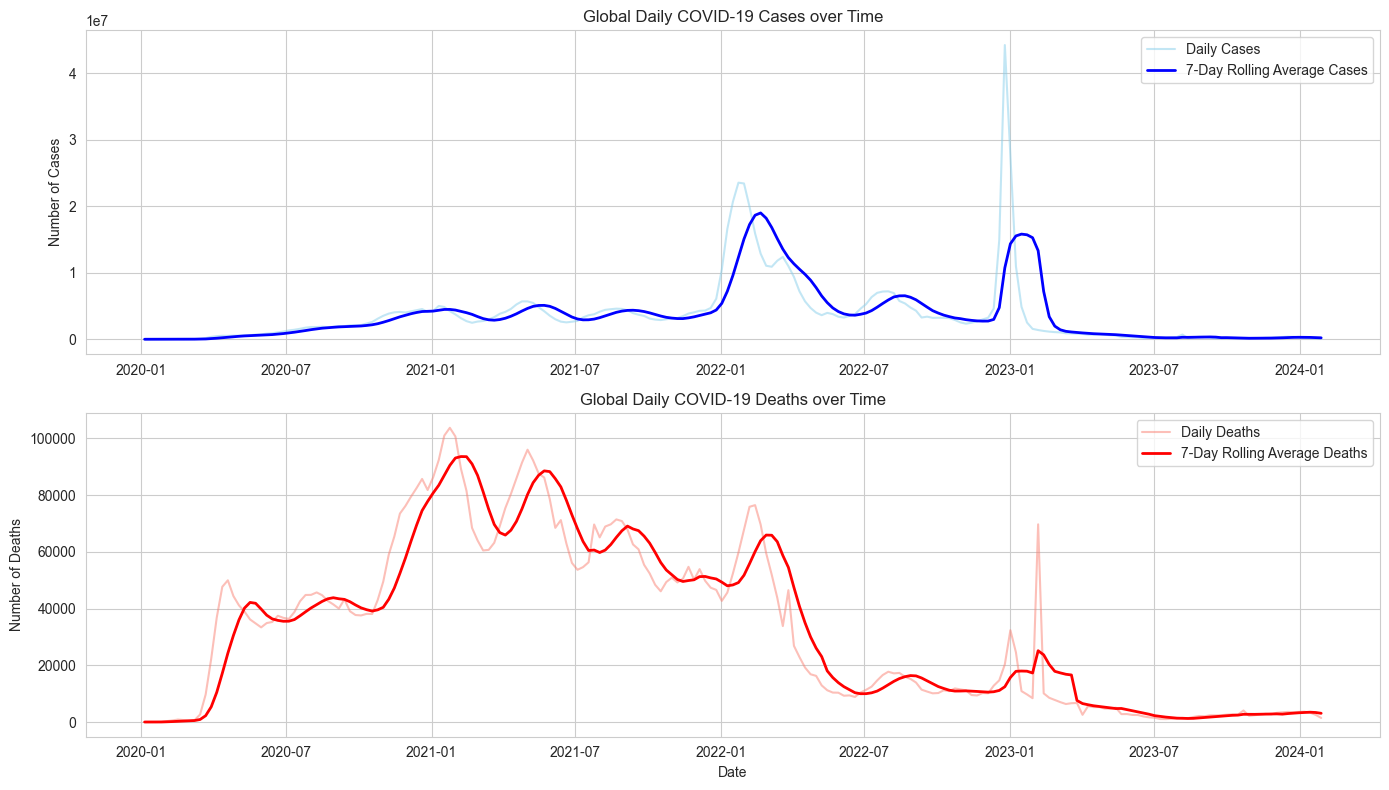

In [79]:
## show the global impact of COVID-19 over time
import seaborn as sns

# set the style of seaborn
sns.set_style('whitegrid')

# aggregate data for global daily cases and deaths
global_data = df.groupby('Date_reported')[['New_cases', 'New_deaths']].sum().reset_index() # reset_index() to convert the groupby object to a DataFrame

# calculate the 7-day rolling average for new cases and deaths to ensure a smooth curve
global_data['New_cases_rolling_avg'] = global_data['New_cases'].rolling(7, 1).mean().fillna(0)
global_data['New_deaths_rolling_avg'] = global_data['New_deaths'].rolling(7, 1).mean().fillna(0)

# plot the global daily cases and deaths
plt.figure(figsize=(14, 8))

# plat the daily cases and 7-day rolling average
plt.subplot(2, 1, 1)
plt.plot(global_data['Date_reported'], global_data['New_cases'], label='Daily Cases', color='skyblue', alpha=0.5)
plt.plot(global_data['Date_reported'], global_data['New_cases_rolling_avg'], label='7-Day Rolling Average Cases', color='blue', linewidth=2)
plt.title('Global Daily COVID-19 Cases over Time')
plt.ylabel('Number of Cases')
plt.legend()

# plot the daily deaths and 7-day rolling average
plt.subplot(2, 1, 2)
plt.plot(global_data['Date_reported'], global_data['New_deaths'], label='Daily Deaths', color='salmon', alpha=0.5)
plt.plot(global_data['Date_reported'], global_data['New_deaths_rolling_avg'], label='7-Day Rolling Average Deaths', color='red', linewidth=2)
plt.title('Global Daily COVID-19 Deaths over Time')
plt.ylabel('Number of Deaths')
plt.xlabel('Date')
plt.legend()

plt.tight_layout()
plt.show()


### The plots above show the global daily COVID-19 cases and deaths over time. The blue line represents the daily cases, while the red line represents the daily deaths. The dark blue line represents the 7-day rolling average of cases, while the dark red line represents the 7-day rolling average of deaths. The 7-day rolling average helps to smooth out the daily fluctuations and provides a clearer picture of the overall trend.

#### insights from the above plots:

* Waves of the Pandemic: The data reveals distinct waves, where the number of cases and deaths surged at different times. These waves could correlate with the emergence of new virus variants, changes in public health policies, and the impact of vaccination campaigns.
* Trends Over Time: The 7-day averages smooth out daily fluctuations, providing a clearer view of the overall trends. For both cases and deaths, these trends highlight the times when the pandemic was at its most severe and when interventions may have been effective in reducing spread and fatalities.
* Global Impact: The sheer scale of the pandemic is evident, with millions of cases and thousands of deaths reported globally over the course of the pandemic. 

### Highlighting the impact of COVID-19 in different regions

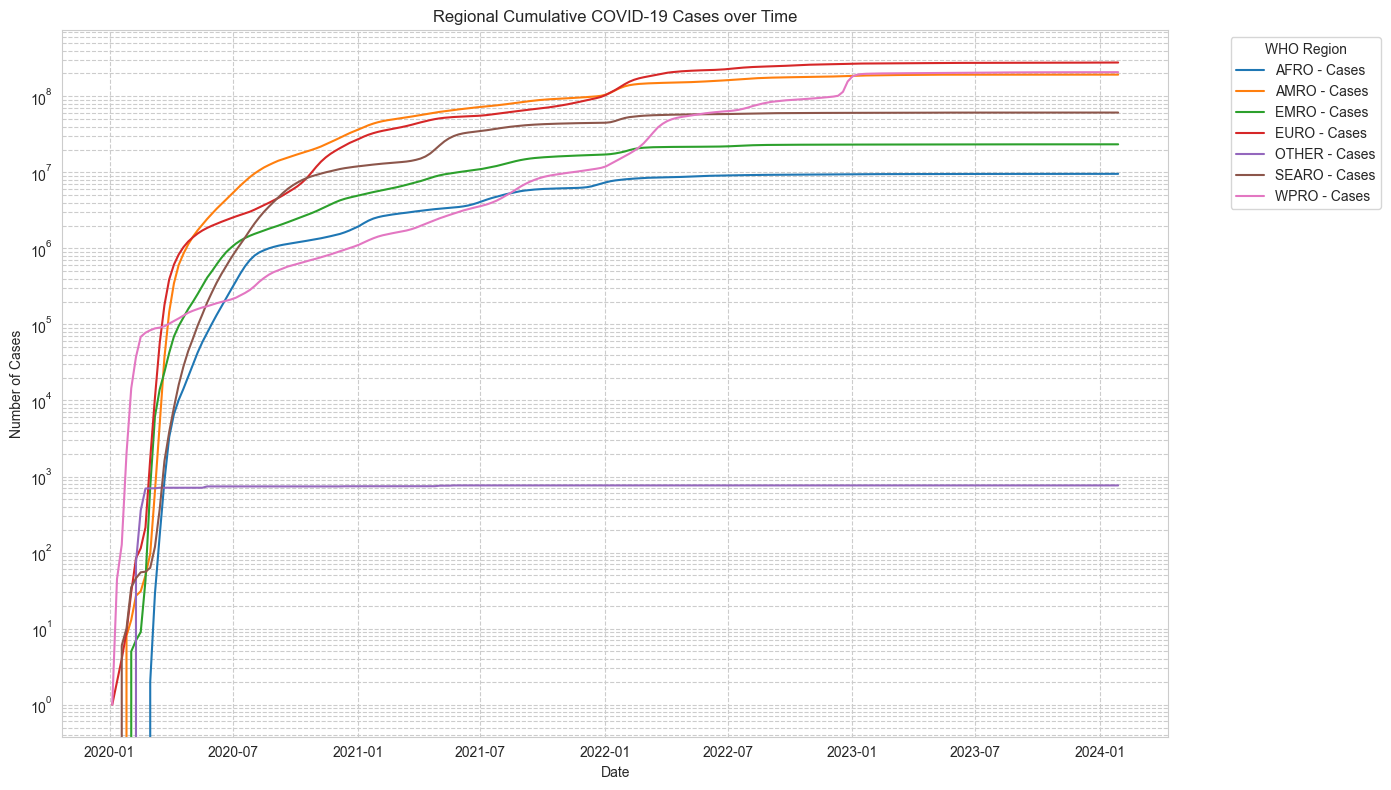

In [83]:
# aggregate data for regional cumulative cases and deaths by who region
regional_data = df.groupby(['Date_reported', 'WHO_region'])[['Cumulative_cases', 'Cumulative_deaths']].sum().reset_index()

# plot the regional cumulative cases and deaths
plt.figure(figsize=(14, 8))

for region in regional_data['WHO_region'].unique(): # loop through each unique region  
    region_data = regional_data[regional_data['WHO_region'] == region]
    plt.plot(region_data['Date_reported'], region_data['Cumulative_cases'], label=f'{region} - Cases')

plt.title('Regional Cumulative COVID-19 Cases over Time')
plt.ylabel('Number of Cases')
plt.xlabel('Date')
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log') # set the y-axis to a logarithmic scale for better visualization
plt.grid(True, which='both', linestyle='--') # added gridlines for better readability
plt.tight_layout()
plt.show()